# Database Analysis

Test and analysis of database.

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import imputation

In [ ]:
def getAge(string):
    from datetime import datetime, date
    
    # get actual date
    actual_date = datetime.now()
    
    # return nan if not available
    if 'not_' in string:
        return float('nan')
    
    # reference date as datetime obj
    reference_date = datetime.strptime(string, '%d/%m/%Y')
    
    # calculate delta 
    delta = actual_date - reference_date
    
    # return years
    return round(delta.total_seconds() / (60*60*24*365),2)

### Read databases 

In [4]:

clients = pd.read_csv('db/clients.csv')
clients.head()


,id_client,name,sex,birthday,own_house,premium_house,own_car,premium_car,active_job,monthly_income,postal_code,cellphone,premium_cellphone,historic_credits,score
0,1,lawg,male,26/11/1995,0,0,1,0,1,not_available,not_available,Huawei,0,0,0
1,2,rhm,male,20/07/1994,0,0,0,0,1,not_available,not_available,Samsung,1,0,0
2,3,atrh,female,26/02/1995,0,0,0,0,1,not_available,not_available,Samsung,0,0,0
3,4,shg,male,not_available,1,1,1,1,1,not_available,not_available,iPhone,1,0,0


In [6]:

investors = pd.read_csv('db/investors.csv')
investors.head()


,id_investor,name,sex,birthday
0,1,lawg,male,26/11/1995
1,2,rhm,male,20/07/1994
2,3,atrh,female,26/02/1995
3,4,shg,male,not_available


In [7]:

transactions = pd.read_csv('db/transactions.csv')
transactions.head()


,id_transac,id_investor,id_client,initial_capital,initial_date,final_capital,final_date,status,on_time,resolved,reference
0,1,2,1,6000,21/09/2016,6328.51,21/03/2017,active,0,0,160921_1_2_1
1,2,3,2,2000,21/09/2016,2000.00,21/03/2017,active,0,0,160921_2_3_2


### Descriptive stats

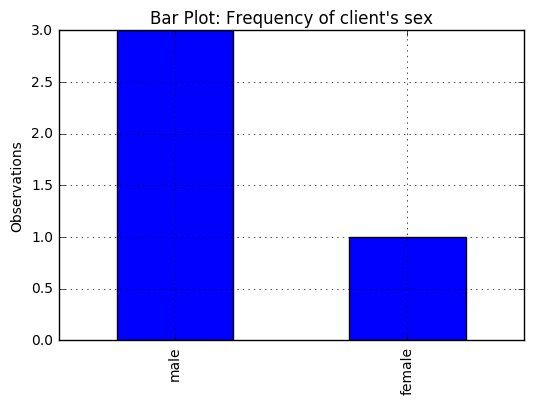

In [24]:

clients.sex.value_counts().plot(kind = 'bar')
plt.title("Bar Plot: Frequency of client's sex")
plt.ylabel('Observations')
plt.grid()


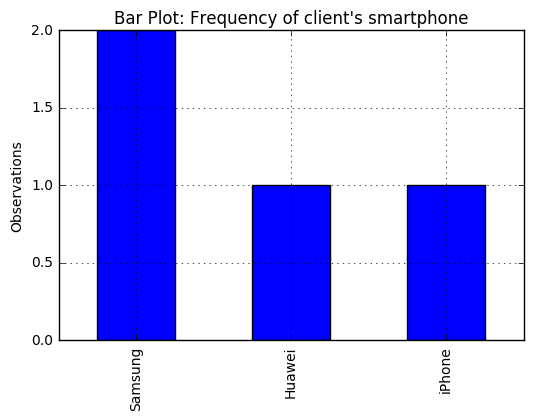

In [62]:

clients.cellphone.value_counts().plot(kind = 'bar')
plt.title("Bar Plot: Frequency of client's smartphone")
plt.ylabel('Observations')
plt.grid()


Mean: 21.78
Std : 0.6763874629234348


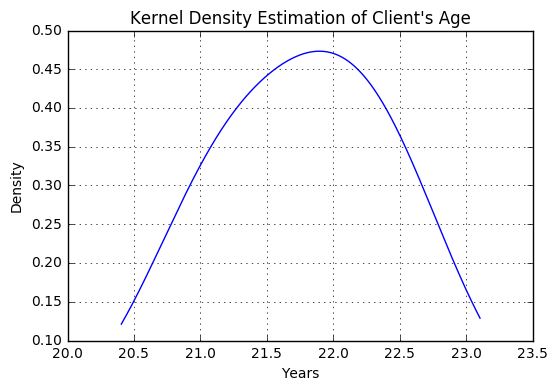

In [64]:

clients.birthday.apply(getAge).plot(kind = 'kde')
plt.title("Kernel Density Estimation of Client's Age")
plt.xlabel('Years')
plt.grid()

print('Mean: {}'.format(clients.birthday.apply(getAge).mean()))
print('Std : {}'.format(clients.birthday.apply(getAge).std()))